In [1]:
import os
import sys
import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits   as fits

from   astropy.table     import Table

In [2]:
sys.path.append('{}'.format(os.environ['HOME']))
sys.path.append('{}/DESI'.format(os.environ['HOME']))

In [3]:
import pubplot
from   findfile import findfile

In [4]:
version = 'GAMA4'
survey  = 'gama'
dryrun  = False

In [5]:
def grab_ddplimit(fpath):
    dat = fits.open(fpath)

    result = {}
    
    for key in ['RLIM', 'GMR_0P0', 'GMR_0P1', 'ALL']:
        result[key] = dat[1].header[key]
        
    result['DATA']  = Table.read(fpath)
    result['COUNT'] = fpath.split('_')[-1].replace('.fits', '')
    
    print(fpath)
    
    return result

In [6]:
! pwd

/cosma/home/durham/dc-wils7/DESI/docs/nb


In [7]:
fpaths = sorted(glob.glob(os.environ['HOME'] + '/data/GAMA4/ddrp_limits/{}*.fits'.format(survey)))
fpaths

['/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_0.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_1.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_10.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_11.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_12.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_13.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_14.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_15.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_16.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_17.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_18.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_19.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/g

In [8]:
ddp_limits = [grab_ddplimit(x) for x in fpaths]

/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_0.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_1.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_10.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_11.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_12.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_13.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_14.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_15.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_16.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_17.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_18.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_19.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_2.fits
/cosma/home/durham/dc-wils7/

In [9]:
fpath = findfile(ftype='kE', version=version, dryrun=dryrun, survey=survey)
kE    = Table.read(fpath)
kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
47605,587722982291603557,213.42738802,-0.73564184,17.309326,0.12207,4,341208172008073216,6,19.38509,18.078592,17.365236,16.966373,16.7554,0.12207,400.92508210825025,38.01531613408952,G15,0,0,-298.17956645436874,-196.81776642506424,-4.587490210502646,299.53948986736197,194.73382175751246,-4.915767652354654,0.713356,17.309326,0.675816092283015,0,4,-0.08447645374943458,-0.046936527966043314,0.13725811593730078,0.2452085576004091,0.605405576403298,2.12,-0.118407905,-0.25878838,-20.72484017305004,-20.58445970110523,-20.843248078151817,38.03416634492504,38.15257425002682,37.89378587298023,-0.08784850687677781,-0.05450693603321766,0.1288763714854233,0.21066835368044562,-20.716458428598163
361855,587726033336598887,212.72358485,2.72760577,19.681965,0.1861,4,G15_Y4_210_308,5,20.8623,20.289927,19.69777,19.552126,19.388702,0.1861,637.5726059349188,39.02264824405066,G15,0,0,-451.7112404603807,-290.25610600747393,25.580159957927325,453.7519315538365,287.09933722681836,25.082894399075023,0.59215736,19.681965,0.4452782872706877,0,3,-0.09244919433039746,0.054429882290516374,0.09752709582440693,0.26511668045499226,0.42456777926101624,2.12,-0.18051702,-0.394532,-19.257693447766147,-19.043678470549427,-19.438210465607487,38.93965832203372,39.12017533987506,38.725643344817,-0.05193740900930433,0.1069342697344915,0.1647874693528968,0.37210955944815477,-19.32495382129464
56153,587722982815891633,184.80823816,-0.22884666,18.329655,0.18589,4,G12_Y1_ND6_063,6,21.067444,19.541246,18.338753,17.908594,17.559956,0.18589,636.7686054350571,39.019908216311215,G12,0,0,-535.0603014922937,-45.00774485743061,-2.144657978255299,535.3584539993313,41.27575811903208,-2.73137532473861,1.2024937,18.329655,0.954389301421153,0,6,0.01332122123046564,0.2614255874118518,0.2420879947395947,0.6513689557763149,0.7932127065658188,0.8,-0.1803133,-0.14871201,-20.752028213380637,-20.783629508255782,-20.932341517447295,39.08168290698415,39.26199621105081,39.113284201859294,-0.05204238411890086,0.1063677698558548,0.16468249424330025,0.37154305956951805,-20.674622712884343
267269,587726016160792889,221.4999384,2.70069145,17.224846,0.13281,5,604723732702849024,6,19.770727,18.02063,16.966005,16.488842,16.121466,0.13281,439.40850818348156,38.214342309137336,G15,0,0,-290.19191491537094,-256.73956249587434,18.27691512481096,291.9949202588759,254.7098577512178,17.956919743362395,1.0546246,17.224846,0.9658242793684275,0,6,-0.0587589572533456,0.030041320873344046,0.1712547520566092,0.4218478626508721,0.8040314469008543,0.8,-0.1288257,-0.106248,-21.03192548064089,-21.054503176189424,-21.160751174963476,38.25677136687136,38.38559706119395,38.2793490624199,-0.08101362552704912,-0.029279133317864192,0.135711252835152,0.23589615639579908,-20.996381981419432
136276,587724650328293642,174.31474017,-1.72842086,18.638361,0.26754,4,G12_Y1_AS2_163,6,21.617983,19.93395,18.491388,17.983116,17.664455,0.26754,962.4845417230698,39.91696881558694,G12,0,0,-755.253819488404,75.18812229

In [10]:
fpath = findfile(ftype='ddp', version=version, dryrun=dryrun, survey=survey)
ddp   = Table.read(fpath)
ddp

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX,DDP [3],DDPZLIMS [3]
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64,int64,int64
47605,587722982291603557,213.42738802,-0.73564184,17.309326,0.12207,4,341208172008073216,6,19.38509,18.078592,17.365236,16.966373,16.7554,0.12207,400.92508210825025,38.01531613408952,G15,0,0,-298.17956645436874,-196.81776642506424,-4.587490210502646,299.53948986736197,194.73382175751246,-4.915767652354654,0.713356,17.309326,0.675816092283015,0,4,-0.08447645374943458,-0.046936527966043314,0.13725811593730078,0.2452085576004091,0.605405576403298,2.12,-0.118407905,-0.25878838,-20.72484017305004,-20.58445970110523,-20.843248078151817,38.03416634492504,38.15257425002682,37.89378587298023,-0.08784850687677781,-0.05450693603321766,0.1288763714854233,0.21066835368044562,-20.716458428598163,2.490673,0.3827480171688763,0.0,-5.309326,0.010905284955384183,0.0,21682199.920635976,1 .. 0,1 .. 0
361855,587726033336598887,212.72358485,2.72760577,19.681965,0.1861,4,G15_Y4_210_308,5,20.8623,20.289927,19.69777,19.552126,19.388702,0.1861,637.5726059349188,39.02264824405066,G15,0,0,-451.7112404603807,-290.25610600747393,25.580159957927325,453.7519315538365,287.09933722681836,25.082894399075023,0.59215736,19.681965,0.4452782872706877,0,3,-0.09244919433039746,0.054429882290516374,0.09752709582440693,0.26511668045499226,0.42456777926101624,2.12,-0.18051702,-0.394532,-19.257693447766147,-19.043678470549427,-19.438210465607487,38.93965832203372,39.12017533987506,38.725643344817,-0.05193740900930433,0.1069342697344915,0.1647874693528968,0.37210955944815477,-19.32495382129464,0.11803436,0.19726272057228,0.0,-7.681965,0.005378815435528172,0.0,3356886.0325422185,0 .. 0,1 .. 0
56153,587722982815891633,184.80823816,-0.22884666,18.329655,0.18589,4,G12_Y1_ND6_063,6,21.067444,19.541246,18.338753,17.908594,17.559956,0.18589,636.7686054350571,39.019908216311215,G12,0,0,-535.0603014922937,-45.00774485743061,-2.144657978255299,535.3584539993313,41.27575811903208,-2.73137532473861,1.2024937,18.329655,0.954389301421153,0,6,0.01332122123046564,0.2614255874118518,0.2420879947395947,0.6513689557763149,0.7932127065658188,0.8,-0.1803133,-0.14871201,-20.752028213380637,-20.783629508255782,-20.932341517447295,39.08168290698415,39.26199621105081,39.113284201859294,-0.05204238411890086,0.1063677698558548,0.16468249424330025,0.37154305956951805,-20.674622712884343,1.4703445,0.3224703831683844,0.0,-6.3296547,0.011883843549400263,0.0,13508431.560004346,1 .. 0,1 .. 0
267269,587726016160792889,221.4999384,2.70069145,17.224846,0.13281,5,604723732702849024,6,19.770727,18.02063,16.966005,16.488842,16.121466,0.13281,439.40850818348156,38.214342309137336,G15,0,0,-290.19191491537094,-256.73956249587434,18.27691512481096,291.9949202588759,254.7098577512178,17.956919743362395,1.0546246,17.224846,0.9658242793684275,0,6,-0.0587589572533456,0.030041320873344046,0.1712547520566092,0.421847862650

In [11]:
ddp.meta

OrderedDict([('AREA', 180.0),
             ('GOLD_NGAL', 121975),
             ('IMMUTABLE', 'False'),
             ('RLIM', 19.8),
             ('RMAX', 12.0),
             ('MAX_SEP', 70.0),
             ('THETA_DEF', 'Z_THETA_QCOLOR'),
             ('DDP1_ZMIN', 0.0190299991518259),
             ('DDP1_ZMAX', 0.2715100049972534),
             ('DDP1_VZ', 8338406.912746496),
             ('DDP1ZLIMS_NGAL', 121975),
             ('DDP1_NGAL', 50872),
             ('DDP1_DENS', 0.00610092557635135),
             ('DDP2_ZMIN', 0.0188400000333786),
             ('DDP2_ZMAX', 0.1936399936676025),
             ('DDP2_VZ', 3179460.348095798),
             ('DDP2ZLIMS_NGAL', 76273),
             ('DDP2_NGAL', 33593),
             ('DDP2_DENS', 0.01056562948492787),
             ('DDP3_ZMIN', 0.01882999949157238),
             ('DDP3_ZMAX', 0.1015100032091141),
             ('DDP3_VZ', 482216.0515798731),
             ('DDP3ZLIMS_NGAL', 20474),
             ('DDP3_NGAL', 9269),
             (

0	0	12.000	0.131	0.164	True
1	1	12.000	0.298	0.299	True
2	10	12.000	0.603	0.555	False
3	11	12.000	0.785	0.682	False
4	12	12.000	0.933	0.773	False
5	13	12.000	1.067	0.900	False
6	14	19.800	0.131	0.164	True
7	15	19.800	0.298	0.299	True
8	16	19.800	0.443	0.423	True
10	18	19.800	0.785	0.682	True
11	19	19.800	0.933	0.773	True
12	2	12.000	0.443	0.423	True
13	20	19.800	1.067	0.900	True
14	21	19.800	0.131	0.164	False
15	22	19.800	0.298	0.299	False
16	23	19.800	0.443	0.423	False
17	24	19.800	0.603	0.555	False
18	25	19.800	0.785	0.682	False
19	26	19.800	0.933	0.773	False
							FAINT: 27
20	27	19.800	1.067	0.900	False
22	4	12.000	0.785	0.682	True
23	5	12.000	0.933	0.773	True
24	6	12.000	1.067	0.900	True
							BRIGHT: 7
25	7	12.000	0.131	0.164	False
26	8	12.000	0.298	0.299	False
27	9	12.000	0.443	0.423	False


(-16.5, -22.5)

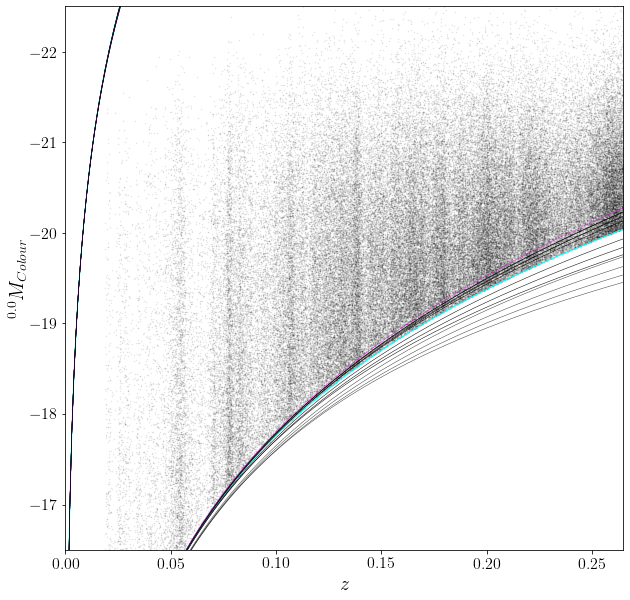

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

plt.scatter(kE['ZGAMA'], kE['DDPMALL_0P0'], s=0.25, alpha=0.1, c='k')

for i, ddp_limit in enumerate(ddp_limits):
    data = ddp_limit['DATA']
    cnt  = ddp_limit['COUNT']
    rlim = ddp_limit['RLIM']
    
    MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]
    
    if 'COLOR' in MCOL:
        alpha = 0.75
    else:
        alpha = 1.00
    
    if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
        ax.plot(data['Z'], data[MCOL], c='cyan', lw=1., alpha=alpha)
        continue
    
    if (ddp_limit['ALL'] == False) & (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)

        print('\t\t\t\t\t\t\tFAINT: {}'.format(cnt))
        
    elif (ddp_limit['ALL'] == False) & (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)

        print('\t\t\t\t\t\t\tBRIGHT: {}'.format(cnt))
        
    else:
        ax.plot(data['Z'], data[MCOL], c='k', lw=0.5, alpha=alpha)
    
    print('{:d}\t{}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, cnt, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))
    
ax.set_xlabel(r'$z$')
ax.set_ylabel('$^{0.0}M_{Colour}$')

ax.set_xlim(  0.0, 0.265)
ax.set_ylim(-16.5, -22.5)

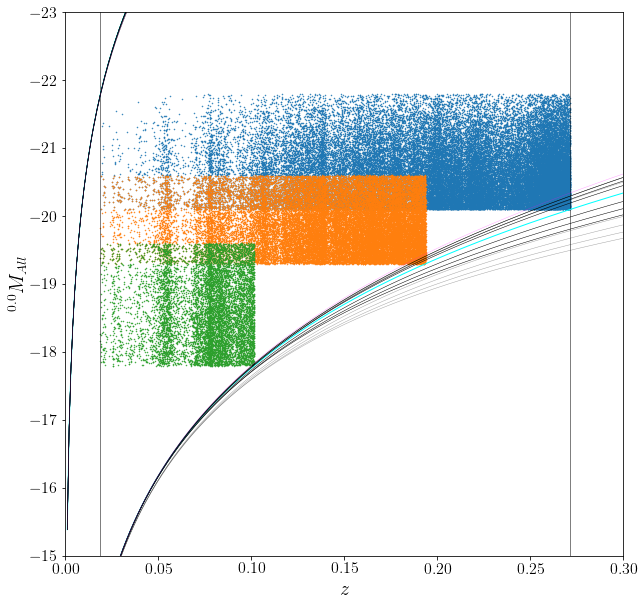

In [15]:
fig, ax   = plt.subplots(1, 1, figsize=(10,10))

colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

axes      = [ax, ax, ax]

for i, ax in enumerate(axes[::-1]):    
    is_ddp = [x == 1 for x in ddp['DDP'].data[:,i]]
    ax.scatter(ddp['ZGAMA'][is_ddp], ddp['DDPMALL_0P0'][is_ddp], s=0.25, alpha=1., c=colors[i])

axes      = [ax]
    
for ax in axes:
    ax.axvline(0.0188, c='k', lw=0.5)
    ax.axvline(0.2715, c='k', lw=0.5)
    
    for i, ddp_limit in enumerate(ddp_limits):
        data = ddp_limit['DATA']

        cnt  = ddp_limit['COUNT']
        rlim = ddp_limit['RLIM']
        
        MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]

        if 'COLOR' in MCOL:
            alpha = 0.35
        else:
            alpha = 1.0

        if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
            ax.plot(data['Z'], data[MCOL], c='cyan', lw=1., alpha=alpha)
            continue
    
        if (ddp_limit['ALL'] == False) & (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
            ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)
        
        elif (ddp_limit['ALL'] == False) & (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
            ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)
        
        else:
            ax.plot(data['Z'], data[MCOL], c='k', lw=0.5, alpha=alpha)
        
        # print('{:d}\t{}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, cnt, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))
    
        ax.set_xlabel(r'$z$')
        ax.set_ylabel('$^{0.0}M_{All}$')
        
        ax.set_xlim(  0.0, 0.300)
        ax.set_ylim(-15.0, -23.0)

# Done.